# Correlation among BTC, ETH, LTC, XRP cryptocurrencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def read_dataset(filename):
    print('Reading data from %s' % filename)
    df = pd.read_csv(filename)
    df.Date = pd.to_datetime(df.Date) # change to datetime
    df = df.set_index('Date') 
    df = df.sort_index() # sort by datetime
    print(df.shape)
    return df

In [3]:
btc = read_dataset('BTC_PRICES_2020.csv')
eth = read_dataset('ETH_PRICES_2020.csv')
ltc = read_dataset('LTC_PRICES_2020.csv')
xrp = read_dataset('XRP_PRICES_2020.csv')

Reading data from BTC_PRICES_2020.csv
(366, 5)
Reading data from ETH_PRICES_2020.csv
(366, 5)
Reading data from LTC_PRICES_2020.csv
(366, 5)
Reading data from XRP_PRICES_2020.csv
(366, 5)


In [4]:
btc.head()

,Currency,Close,Open,High,Low
Date,,,,,
2020-01-01,BTC,7179.957819,7251.277888,7298.892042,7119.626946
2020-01-02,BTC,9388.880752,9548.545376,9558.432613,9198.659041
2020-01-03,BTC,8639.591417,8778.467316,8806.844965,8591.292540
2020-01-04,BTC,6446.421347,6483.617042,6533.064909,6344.633536
2020-01-05,BTC,8767.672623,8768.047180,9469.078423,8415.474740


In [5]:
eth.head()

,Currency,Close,Open,High,Low
Date,,,,,
2020-01-01,ETH,128.722603,132.126527,133.405184,127.846577
2020-01-02,ETH,181.728434,186.328560,186.611102,175.029199
2020-01-03,ETH,223.499288,229.786046,233.269199,221.445615
2020-01-04,ETH,133.892931,133.749800,135.284805,130.613336
2020-01-05,ETH,210.620234,215.128957,227.463250,202.278779


In [6]:
ltc.head()

,Currency,Close,Open,High,Low
Date,,,,,
2020-01-01,LTC,41.213575,42.388688,42.882966,40.901041
2020-01-02,LTC,68.403032,68.979720,69.822341,65.359336
2020-01-03,LTC,59.023783,61.039843,61.698533,58.197111
2020-01-04,LTC,39.288700,39.276330,39.375602,38.498404
2020-01-05,LTC,46.974650,48.606065,50.879329,45.795808


In [7]:
xrp.head()

,Currency,Close,Open,High,Low
Date,,,,,
2020-01-01,XRP,0.191558,0.193147,0.193645,0.189422
2020-01-02,XRP,0.239005,0.245752,0.246314,0.233371
2020-01-03,XRP,0.234138,0.239172,0.242618,0.232423
2020-01-04,XRP,0.175653,0.173253,0.178340,0.170782
2020-01-05,XRP,0.215296,0.226822,0.235947,0.208506


In [8]:
df = pd.DataFrame({'BTC': btc.Close,
                   'ETH': eth.Close,
                   'LTC': ltc.Close,
                   'XRP': xrp.Close})
df.head()

,BTC,ETH,LTC,XRP
Date,,,,
2020-01-01,7179.957819,128.722603,41.213575,0.191558
2020-01-02,9388.880752,181.728434,68.403032,0.239005
2020-01-03,8639.591417,223.499288,59.023783,0.234138
2020-01-04,6446.421347,133.892931,39.288700,0.175653
2020-01-05,8767.672623,210.620234,46.974650,0.215296


In [9]:
df.describe()

,BTC,ETH,LTC,XRP
count,366.000000,366.000000,366.000000,366.000000
mean,11064.477459,305.981355,56.026844,0.258363
std,4194.494640,142.560966,17.732758,0.104489
min,4944.702336,107.898345,32.053195,0.138613
25%,8883.348266,200.518066,44.100596,0.198159
50%,9695.061967,244.172509,48.723677,0.235991
75%,11663.909757,389.241014,61.075483,0.271939
max,28768.836210,746.062517,129.601959,0.684358


## Visualize absolute closing prices

The chart below shows the absolute closing prices. It is not of much use as BTC closing prices are much higher than prices of ETH, LTC and XRP

<AxesSubplot:xlabel='Date'>

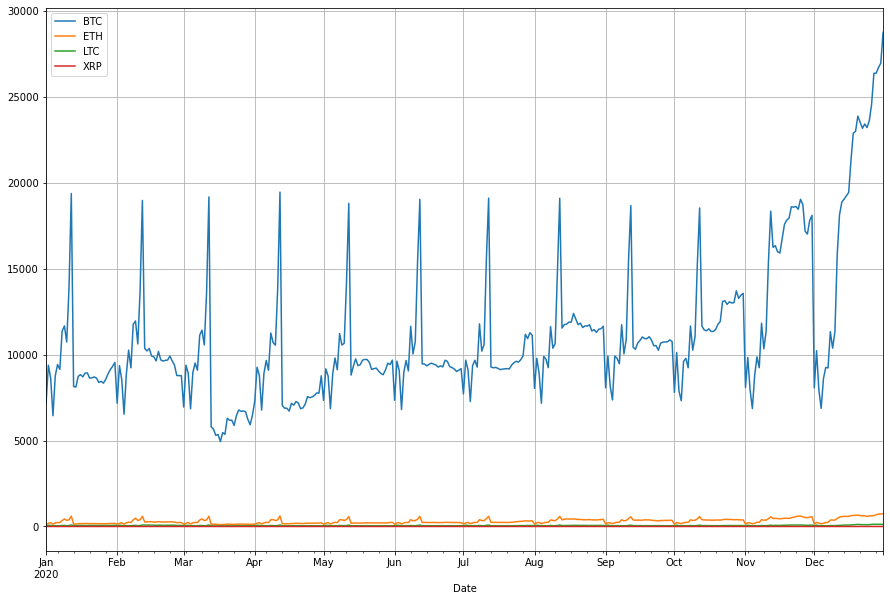

In [11]:
df.plot(grid=True, figsize=(15, 10))

## Measure the correlation of closing prices

Calculation of the Pearson correlation between the closing prices of BTC, ETH, LTC and XRP

In [12]:
# Compute the correlation matrix
corr = df.corr()
corr

,BTC,ETH,LTC,XRP
BTC,1.000000,0.940477,0.859088,0.736887
ETH,0.940477,1.000000,0.750635,0.763482
LTC,0.859088,0.750635,1.000000,0.697081
XRP,0.736887,0.763482,0.697081,1.000000


As the correlation matrix is symmetric, only the lower half is shown

<AxesSubplot:>

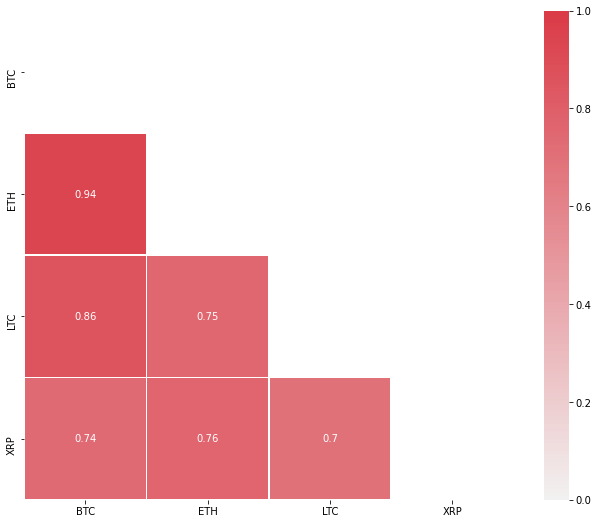

In [16]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=1, vmin=0, center=0, square=True, linewidths=.5 )


# Results

we can see from the plot that all the four BTC,ETH, LTC and XRP are highly correlated

BTC and ETH are very highly correlated with 0.94